In [1]:
import datetime
import numpy as np
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import gamma 
#Created a 01/27/2022 
print(f'Last edited: {datetime.datetime.now()}')

Last edited: 2022-09-05 19:22:29.585693


### Get sensitive cell - for sensitivity constraint - Step plot 

In [ ]:
## Get sensitivity from time course

In [2]:
filename = 'Data/IGF/140_8_New.xlsx'
df = pd.read_excel (filename)
dat = df.to_numpy()
dat.shape

(101, 402)

In [3]:
TimeArr = dat[:,0]
dat = dat[:,1:]
dat.shape

(101, 401)

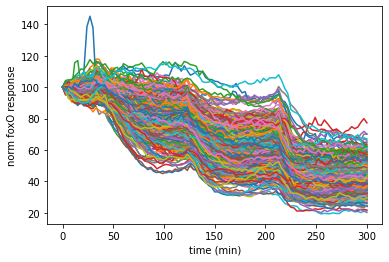

In [11]:
plt.plot(TimeArr,dat)
plt.xlabel('time (min)')
plt.ylabel('norm foxO response')
plt.show()

In [21]:
TimeArr.shape
idx = np.where(TimeArr>=210)[0]
# idx[0]

In [23]:
# last int 
cell_125= dat[idx,:] # cells at concentration 125 pM 
cell_125.shape

(31, 401)

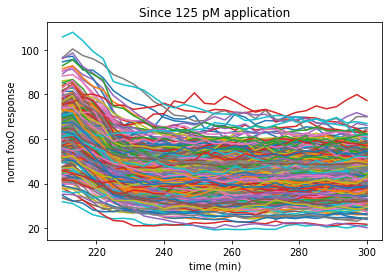

In [24]:
plt.plot(TimeArr[idx],cell_125)
plt.xlabel('time (min)')
plt.ylabel('norm foxO response')
plt.title('Since 125 pM application')
plt.show()

In [26]:
np.max(cell_125[-1,:])

77.24689164278156

In [13]:
### for each cell get lowest response - highest response 
# should i do max - min or just res at 0 
min_res = np.min(dat,axis =0)
max_res = np.max(dat, axis = 0)
min_res.shape

(401,)

### Get percentile constraints

In [4]:

### load the data 
DataDict = np.load('ProDataDict_allconc.npy', allow_pickle=True)
DataDict = DataDict.item()
for key in DataDict:
    print(key)
    
    print(f'Data shape = {DataDict[key].shape}')

10pM
Data shape = (61, 301)
15pM
Data shape = (61, 300)
20pM
Data shape = (61, 300)
25pM
Data shape = (61, 300)
50pM
Data shape = (61, 300)
250pM
Data shape = (61, 300)


### Get sensitivity constraints from 50 pM 

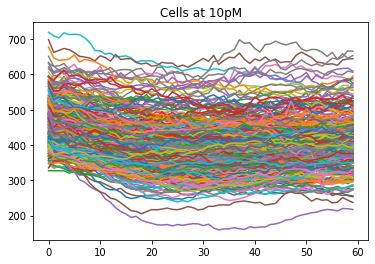

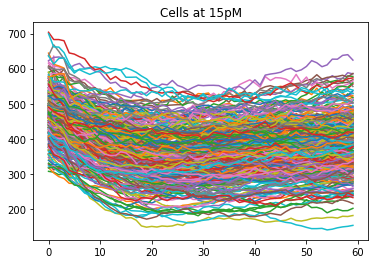

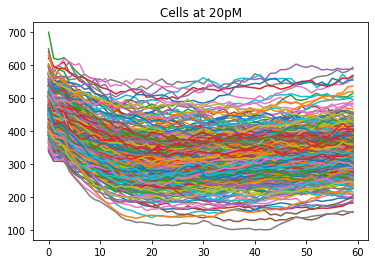

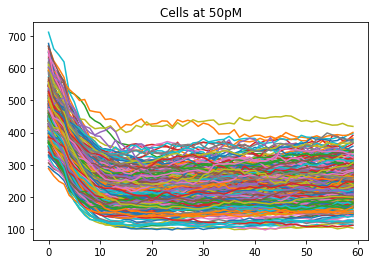

In [11]:
mat = DataDict['10pM']
mat = np.delete(mat, 1, axis = 0)
plt.plot( mat)
plt.title('Cells at 10pM')
plt.show()


mat = DataDict['15pM']
mat = np.delete(mat, 1, axis = 0)
plt.plot( mat)
plt.title('Cells at 15pM')
plt.show()


mat = DataDict['20pM']
mat = np.delete(mat, 1, axis = 0)
plt.plot( mat)
plt.title('Cells at 20pM')
plt.show()


mat = DataDict['50pM']
mat = np.delete(mat, 1, axis = 0)
plt.plot( mat)
plt.title('Cells at 50pM')
plt.show()


In [23]:
dat = DataDict['50pM']
rel_dat = dat/dat[0,:]

In [27]:
np.max(rel_dat[30,:])

0.8428617063517709

In [25]:
rel_dat.shape
rel_dat = np.delete(rel_dat,1,axis =0 )

rel_dat.shape

(60, 300)

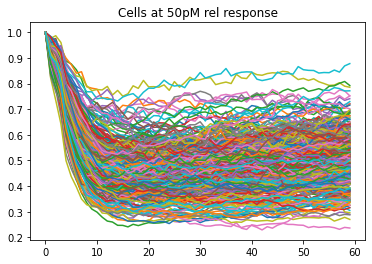

In [26]:
plt.plot(rel_dat)
# rel_dat = np.delete(rel_dat,1,axis =1 )
plt.title('Cells at 50pM rel response')
plt.show()

In [30]:
## load from excel sheet 
fn = 'Data/IGF/EXP129_NORMALIZED.xlsx'
import pandas as pd
df = pd.read_excel (fn, sheet_name='50pM', header = None)
dat = df.to_numpy()
dat.shape
dat = dat[:,1:]
# dat

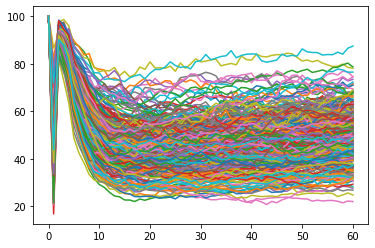

In [31]:
plt.plot(dat)
plt.show()

In [33]:
np.max(dat[-1,:])

87.4632316969752

In [5]:
time_values = [0,6,12,24,45,60,90] #minutes 
times_constrained = np.array(time_values) #minutes 

idx_list = np.array(times_constrained/3, dtype=int)
dist_gparams = defaultdict(lambda:'not present')
lim_dict_min = defaultdict(lambda: 'not present')
lim_dict_max = defaultdict(lambda: 'not present')

min_arr = np.array([])
max_arr = np.array([])
mu_arr_all = np.array([])
var_arr_all  = np.array([])
#######
perc_arr = np.arange(.1,1,.1)
print(perc_arr)
pcl_dict = defaultdict(lambda:'not present') #percentile constraint dictionary
# pcl = [] #percentile constraint list 
ax = 1
for key in DataDict:
    # relevant data
    drel  = DataDict[key][idx_list,:]
    print(key)
    # print(f'max, {np.max(drel, axis = ax)}')
    
    lim_dict_min[key] = np.min(drel, axis = ax)
    lim_dict_max[key] = np.max(drel, axis = ax)
    
    
    min_arr = np.concatenate((min_arr,lim_dict_min[key]) , axis = 0)
    max_arr = np.concatenate((max_arr,lim_dict_max[key]) , axis = 0)
    
    muarr = np.mean(drel, axis = ax)
    vararr = np.var(drel, axis = ax)
    
    
    mu_arr_all  = np.concatenate((mu_arr_all, muarr), axis =0) 
    var_arr_all = np.concatenate((var_arr_all,vararr ), axis =0) 
    
    
    alpha_arr = (muarr**2)/(vararr)
    scale_arr = vararr/muarr
    
    
    # dist_gparams[key] =  {'alphas' : alpha_arr, 'scales': scale_arr}
    
    for p in perc_arr: 
        pcl_dict[f'{key}_{np.round(p,2)}'] = gamma.ppf(p,alpha_arr , scale = scale_arr)
        
        
        
        

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
10pM
15pM
20pM
25pM
50pM
250pM


In [7]:
Mu_Var_Cons = {'mu': mu_arr_all, 'var': var_arr_all}
np.save('Arrays_for_max_ent/MuVar_dict_allconc.npy',Mu_Var_Cons )

In [4]:
lim_dict_max = dict(lim_dict_max)
lim_dict_min = dict(lim_dict_min)

# save dictionary
np.save('Arrays_for_max_ent/MinimumFoxO_dict_allconc.npy',lim_dict_min )
np.save('Arrays_for_max_ent/MaximumFoxO_dict_allconc.npy',lim_dict_max )

# save arrays 
np.save('Arrays_for_max_ent/MinimumFoxO_arr_allconc.npy',min_arr )
np.save('Arrays_for_max_ent/MaximumFoxO_arr_allconc.npy',max_arr )

In [5]:
# the bounds will be 10% on either side of the bounds 
p = 0.1 # 10%
min_arr2 = min_arr - p* min_arr

max_arr2 = max_arr + p* max_arr

# 

In [6]:
# save arrays 
np.save('Arrays_for_max_ent/MinFoxOBound_allconc.npy',min_arr2 )
np.save('Arrays_for_max_ent/MaxFoxOBound_allconc.npy',max_arr2 )

In [7]:
time_values = [0,6,12,24,45,60,90] #minutes 
times_constrained = np.array(time_values) #minutes 

idx_list = np.array(times_constrained/3, dtype=int)
# dist_gparams = defaultdict(lambda:'not present')
perc_arr = np.arange(.1,1,.1)
print(perc_arr)

pcon_dict = defaultdict(lambda:'not present')
nL = len(DataDict)
nT = len(time_values)
for p in perc_arr:
    parr = np.asarray([])
    for key in DataDict:
        drel  = DataDict[key][idx_list,:]
    
        muarr = np.mean(drel, axis = 1)
        vararr = np.var(drel, axis = 1)

        alpha_arr = (muarr**2)/(vararr)
        scale_arr = vararr/muarr
        
        # parr.append(gamma.ppf(p,alpha_arr , scale = scale_arr))
        parr = np.concatenate((parr, gamma.ppf(p,alpha_arr , scale = scale_arr)), axis = 0)
        percentiles = gamma.cdf(gamma.ppf(p,alpha_arr , scale = scale_arr), a =alpha_arr, scale = scale_arr)
        # print(percentiles)
    pcon_dict[f'{np.round(p,2)}']= np.asarray(parr)
    
        

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [8]:
# list(pcon2.keys())[0]

NameError: name 'pcon2' is not defined

In [9]:
pcl_dict

defaultdict(<function __main__.<lambda>()>,
            {'10pM_0.1': array([385.43112921, 370.8529372 , 367.61061568, 347.70122303,
                    317.9040725 , 303.6818437 , 301.15885188]),
             '10pM_0.2': array([413.13827067, 397.03981155, 394.96473479, 375.28248031,
                    346.33534375, 332.78791536, 329.9989459 ]),
             '10pM_0.3': array([433.93017301, 416.67743082, 415.51955419, 396.06253808,
                    367.87123427, 354.9096879 , 351.91763881]),
             '10pM_0.4': array([452.24349699, 433.96524608, 433.6423364 , 414.41974758,
                    386.97200261, 374.57911089, 371.40588883]),
             '10pM_0.5': array([469.82167616, 450.55178901, 451.05273706, 432.08499875,
                    405.41553358, 393.61222146, 390.26318754]),
             '10pM_0.6': array([487.84986056, 467.5559516 , 468.92335876, 450.24566527,
                    424.43657082, 413.28013734, 409.74894894]),
             '10pM_0.7': array([507.6410997 

In [94]:
gamma.ppf(p,alpha_arr , scale = scale_arr)

array([578.29076701, 528.66125568, 482.48648594, 358.87349511,
       294.67317407, 291.54378206, 298.42974295])

In [10]:
pcon_dict = dict(pcon_dict)
np.save('Arrays_for_max_ent/pcon_dict_all_conc.npy', pcon_dict, allow_pickle=True)

In [104]:
len(pcon_dict['0.1'])

28

In [11]:
pcon2 = np.load('Arrays_for_max_ent/pcon_dict_all_conc.npy', allow_pickle=True).item()
for key in pcon2:
    print(key)
    print(pcon2[key].shape)

0.1
(42,)
0.2
(42,)
0.3
(42,)
0.4
(42,)
0.5
(42,)
0.6
(42,)
0.7
(42,)
0.8
(42,)
0.9
(42,)


In [41]:
nBins =20
perc_arr = np.arange(1/nBins,1,1/nBins)
print(perc_arr)
print(len(perc_arr))

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]
19


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


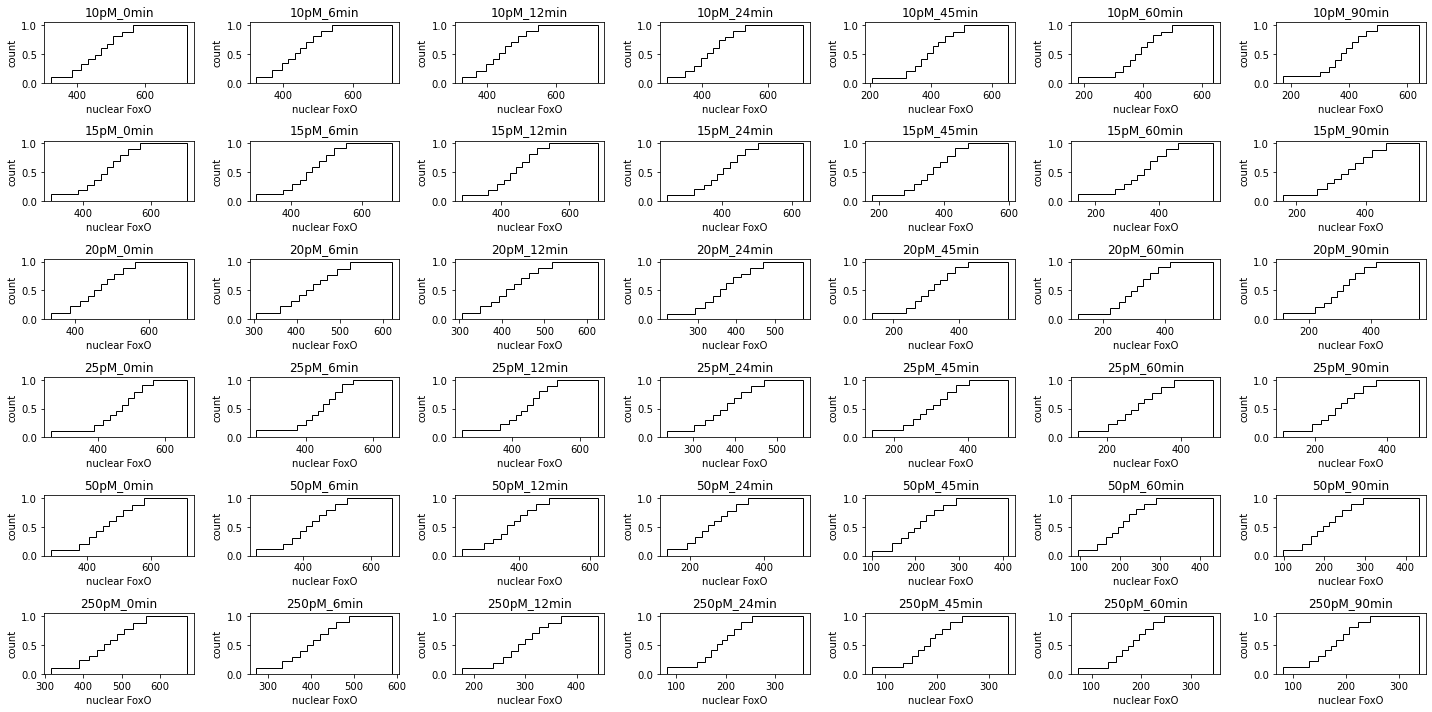

In [12]:
#  Check the error of those constraints ! 
# for each condition, draw the histogram defined by those boundaries 
time_values = [0,6,12,24,45,60,90] #minutes 
times_constrained = np.array(time_values) #minutes 

idx_list = np.array(times_constrained/3, dtype=int)
# dist_gparams = defaultdict(lambda:'not present')
perc_arr = np.arange(.1,1,.1)
print(perc_arr)
# pcl_dict = defaultdict(lambda:'not present') #percentile constraint dictionary
# pcl = [] #percentile constraint list
nR = len(DataDict)
fig, axs = plt.subplots(nR,nT, figsize = (20,10))
nT = len(time_values)
nr = 0; nc = 0;
for key in DataDict:
    # relevant data
    for ii in range(nT):
        # print(f'{key}_{times_constrained[ii]}min')
        drel  = DataDict[key][idx_list[ii],:]
        bins = np.zeros((len(perc_arr)+2))
        bins[0]=np.min(drel)
        bins[-1] = np.max(drel)
        for j in range(0,len(perc_arr)): 
            k = f'{key}_{np.round(perc_arr[j],2)}'
            # print(k)
            bins[j+1] = pcl_dict[k][ii]
        # print('bins:', bins)
        axs[nr, nc].hist(drel,edgecolor='black', bins=bins, cumulative = True, density=True, histtype='step')
        axs[nr, nc].set_title(f'{key}_{times_constrained[ii]}min')
        axs[nr, nc].set_xlabel('nuclear FoxO')
        axs[nr, nc].set_ylabel('count')
        # plt.show()
        nc+=1 
        if nc==nT: 
            nc=0
            nr+=1 
plt.tight_layout()

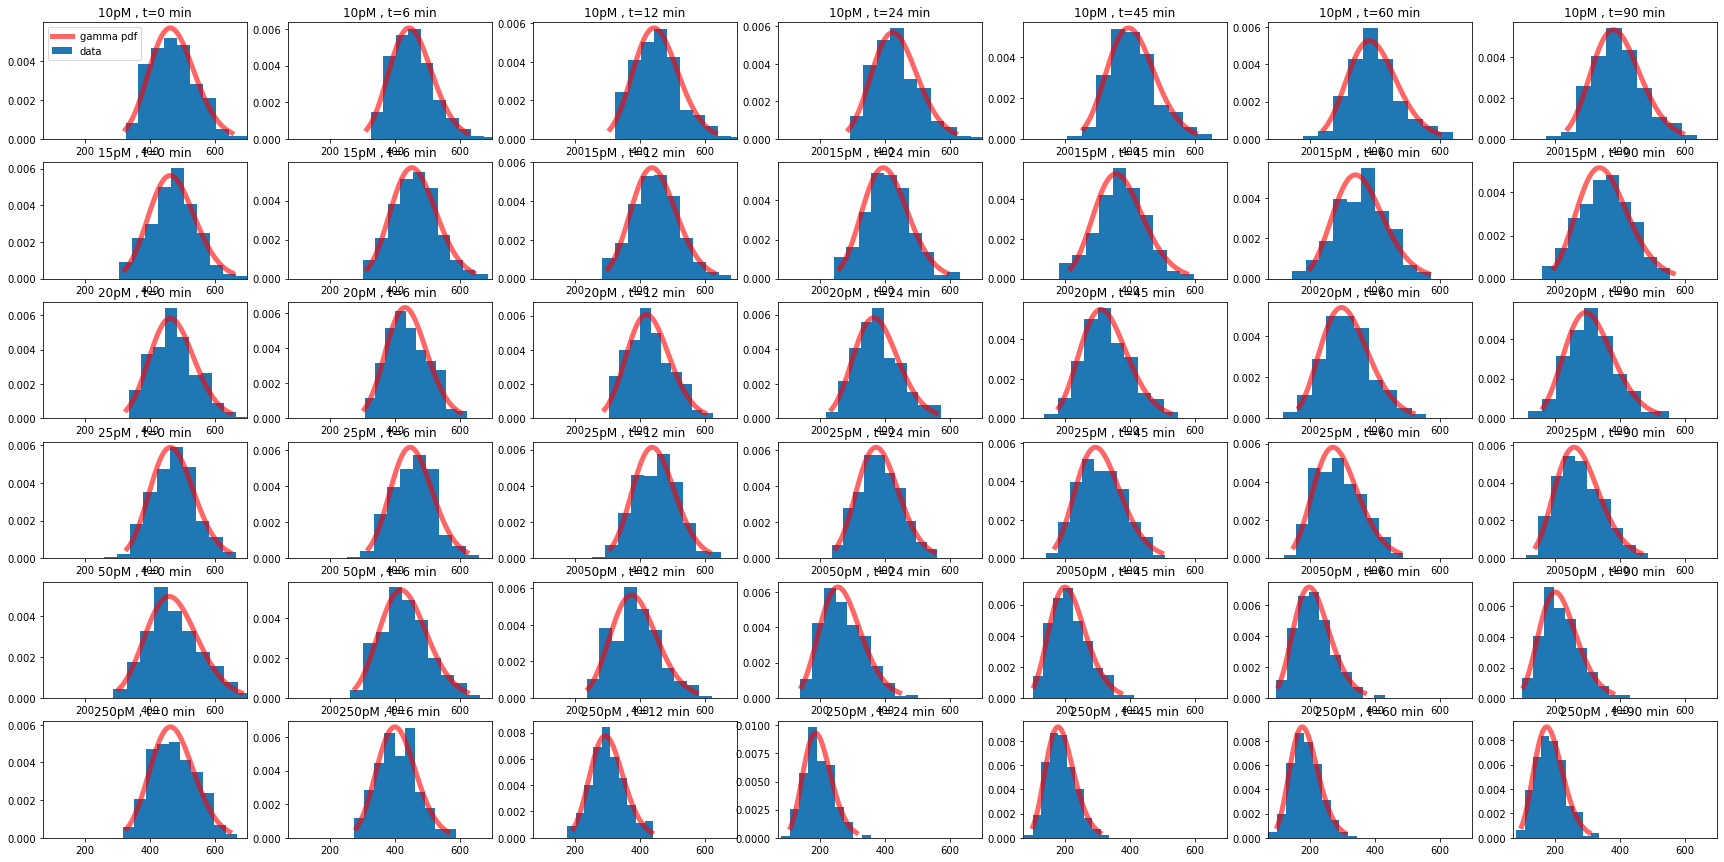

In [13]:
time_values = [0,6,12,24,45,60,90] #minutes 
times_constrained = np.array(time_values) #minutes 

idx_list = np.array(times_constrained/3, dtype=int)
dist_gparams = defaultdict(lambda:'not present')
nC = len(idx_list)
nR = len(DataDict)
fig, axs = plt.subplots(nR, nC, figsize = (30,15))
nr = 0 
nc = 0 
for key in DataDict:
    for ii in idx_list: 
        drel=DataDict[key][ii,:]
        m = np.mean(drel)#, axis = 1)
        v = np.var(drel)#, axis = 1)
        a = (m**2)/(v)
        s = v/m
        axs[nr,nc].hist(drel ,density=True, label='data')
        x = np.linspace(gamma.ppf(0.01, a, scale = s),
                gamma.ppf(0.99, a, scale = s), 100)
        axs[nr,nc].plot(x, gamma.pdf(x, a, scale = s),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
        axs[nr,nc].set_xlim([70,700])
        axs[nr,nc].set_title(f'{key} , t={times_constrained[nc]} min')
        if nr==0:
            if nc==0:
                
                axs[nr,nc].legend()
        nc+=1 
        if nc==nC:
            nc=0
            nr+=1 
        # plt.show()
# plt.tight_layout()
        

In [54]:
i = -1
mu=muarr[i]
v = vararr[i]
# 
a = alpha_arr[i]
s = scale_arr[i]
# 
mean, var, skew, kurt = gamma.stats(a, scale = s, moments='mvsk')

In [55]:
var

array(3404.90446794)

In [56]:
v

3404.9044679413664

In [78]:
p1 = gamma.ppf(.1,alpha_arr , scale = scale_arr)

In [67]:
p2 = gamma.ppf(.1,a,loc=a,scale = s)

In [75]:
p1

array([150.41805383, 171.13691276])

In [71]:
len(np.where(drel<p1)[0])

27

In [76]:
gamma.cdf(p1, alpha_arr , scale = scale_arr)

array([0.1, 0.2])

In [79]:
p1

array([374.14766873, 341.56687039, 301.73790835, 195.49232158,
       150.61726016, 148.53657874, 150.41805383])